<a href="https://colab.research.google.com/github/tatwan/colab_ts_collection/blob/main/Chapter_12_pycaret_colab_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Time Series

# PyCaret

In [1]:
!pip install pycaret-ts-alpha

In [2]:
import pycaret
pycaret.__version__

'3.0.0'

In [3]:
import pandas as pd
from pathlib import Path
from pycaret.time_series import * 
import warnings
warnings.simplefilter(action='ignore', 
                      category=FutureWarning)

warnings.filterwarnings('ignore')

In [4]:
path = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch12/'

df = pd.read_csv(path+'energy_consumption.csv', 
                     index_col='Month', 
                     parse_dates=True)
df.columns = ['y']
df.head()

,y
Month,
1973-01-01,1957.641
1973-02-01,1712.143
1973-03-01,1510.079
1973-04-01,1183.421
1973-05-01,1006.326


In [5]:
df.isna().sum()

y    0
dtype: int64

In [6]:
df.tail()

,y
Month,
2021-08-01,1755.212
2021-09-01,1456.901
2021-10-01,1315.799
2021-11-01,1644.306
2021-12-01,2032.352


In [7]:
fig_settings = {"width": 1000, "height": 600}

s = setup(
    data=df, session_id=22,
    fh=16, fold=5,
    fig_kwargs=fig_settings
    )

,Description,Value
0,session_id,22
1,Target,y
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(588, 1)"
5,Train data shape,"(572, 1)"
6,Test data shape,"(16, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,5
9,Enforce Prediction Interval,False


In [8]:
model = s.compare_models(sort='SMAPE')

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,96.2708,129.1298,0.0539,0.0526,1.1324,1.0672,0.8515,0.476
ets,ETS,97.5104,129.9,0.0547,0.0535,1.1471,1.0738,0.85,0.344
auto_arima,Auto ARIMA,97.7031,129.1909,0.0564,0.0545,1.1497,1.0682,0.8531,46.072
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,98.7823,131.3118,0.0574,0.0554,1.1603,1.0845,0.8294,0.072
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,101.2451,134.3964,0.0594,0.057,1.1897,1.1103,0.8215,0.058
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,101.2406,134.3909,0.0594,0.057,1.1897,1.1103,0.8215,0.056
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,101.2478,134.3998,0.0594,0.057,1.1897,1.1103,0.8215,0.056
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,101.2406,134.3909,0.0594,0.057,1.1897,1.1103,0.8215,0.058
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,101.2406,134.3909,0.0594,0.057,1.1897,1.1103,0.8215,0.056
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,102.0318,135.2673,0.0599,0.0575,1.199,1.1175,0.8195,0.058


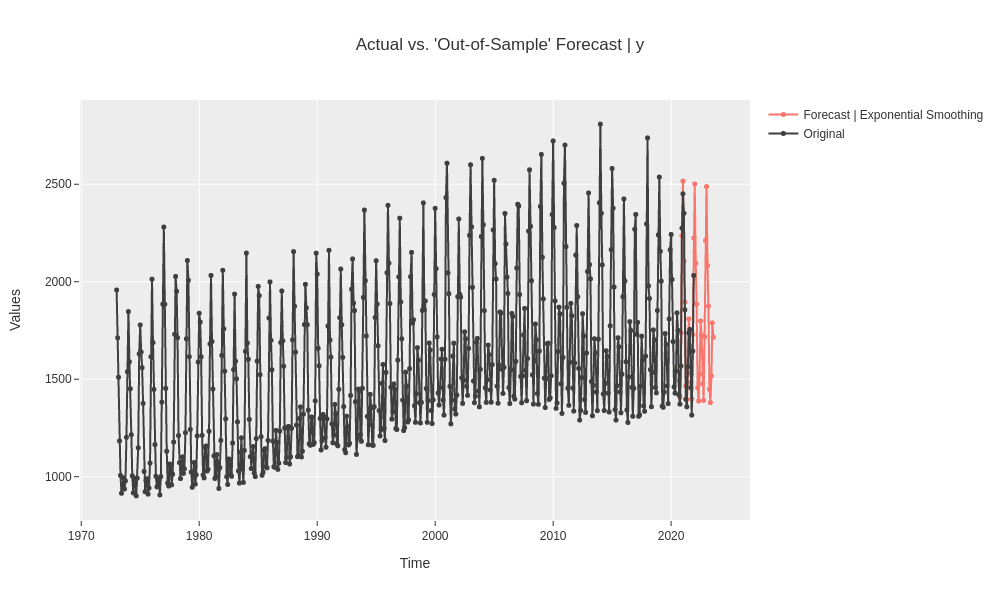

In [9]:
plot_model(model, plot='forecast', 
           data_kwargs = {'fh' : 36})

In [10]:
model

ExponentialSmoothing(seasonal='mul', sp=12, trend='add')

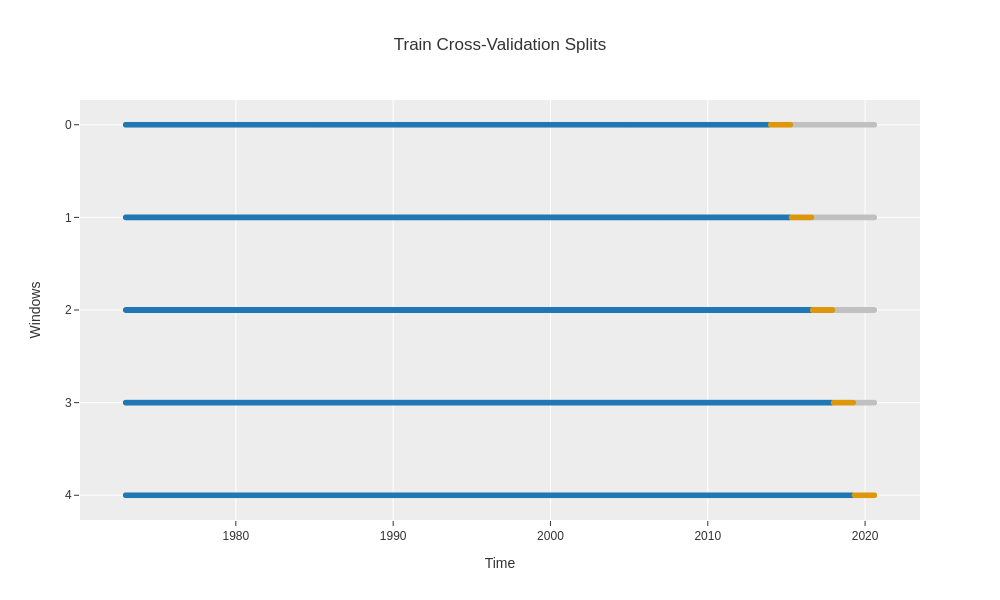

In [11]:
plot_model(model, plot='cv')

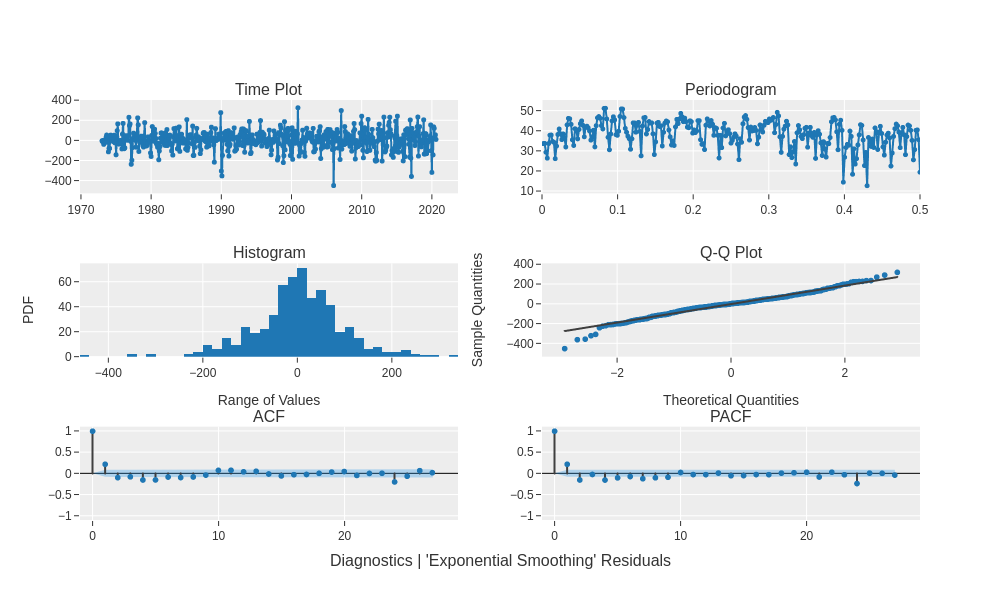

In [12]:
plot_model(model, plot='diagnostics')

In [13]:
model_tuned = tune_model(model)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2013-12,138.2648,161.1378,0.0752,0.0742,1.6536,1.3582,0.8825
1,2015-04,71.1776,107.9233,0.0418,0.0401,0.8451,0.9021,0.8679
2,2016-08,98.5610,143.2389,0.0566,0.0545,1.1576,1.1791,0.8320
3,2017-12,84.7977,109.2345,0.0450,0.0462,0.9891,0.8944,0.9260
4,2019-04,75.7442,118.1470,0.0413,0.0405,0.8647,0.9523,0.8049
Mean,NaT,93.7091,127.9363,0.0520,0.0511,1.1020,1.0572,0.8627
SD,NaT,24.1602,20.8931,0.0129,0.0127,0.2975,0.1828,0.0417


In [14]:
model

ExponentialSmoothing(seasonal='mul', sp=12, trend='add')

In [15]:
model_tuned

ExponentialSmoothing(seasonal='mul', sp=24, trend='additive', use_boxcox=False)

In [16]:
final = finalize_model(model_tuned)
save_model(final, 'energy_exp_model')
energy_model = load_model('energy_exp_model')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


In [17]:
import numpy as np
fh = np.arange(24)
energy_model.predict(fh=fh)

2021-12    2168.243695
2022-01    2420.528248
2022-02    2015.771222
2022-03    1760.176084
2022-04    1428.971809
2022-05    1347.743483
2022-06    1504.879728
2022-07    1755.915373
2022-08    1687.487341
2022-09    1403.562254
2022-10    1333.779617
2022-11    1599.435412
2022-12    2184.165826
2023-01    2412.280660
2023-02    2110.335060
2023-03    1846.625657
2023-04    1351.793321
2023-05    1313.081720
2023-06    1463.802229
2023-07    1691.565596
2023-08    1657.165362
2023-09    1403.247025
2023-10    1307.390644
2023-11    1611.491524
Freq: M, dtype: float64

## There is more

In [18]:
econ = pd.read_csv(path+'../../datasets/Ch12/economic_df.csv')
econ.head()

,DATE,FEDFUNDS,unrate,CORESTICKM159SFRBATL
0,1990-01-01,8.23,5.4,4.920589
1,1990-02-01,8.24,5.3,4.935526
2,1990-03-01,8.28,5.2,5.208701
3,1990-04-01,8.26,5.4,5.294134
4,1990-05-01,8.18,5.4,5.183754


In [19]:
econ.shape

(386, 4)

In [22]:
s = setup(
    data=econ, session_id=23,
    fh=12, fold=3,
    fig_kwargs=fig_settings, 
    enforce_exogenous=True,
    target='unrate', index='DATE',
    ignore_features=['CORESTICKM159SFRBATL']
    )

,Description,Value
0,session_id,23
1,Target,unrate
2,Approach,Univariate
3,Exogenous Variables,Present
4,Data shape,"(386, 3)"
5,Train data shape,"(374, 2)"
6,Test data shape,"(12, 2)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [23]:
model = s.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
par_cds_dt,Passive Aggressive w/ Cond. Deseasonalize & De...,1.6248,2.0808,0.2188,0.2564,2.3046,2.1452,-27.8056,0.0933
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.7136,2.0392,0.208,0.269,2.4388,2.1066,-7.9198,0.1167
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.7424,2.0805,0.2173,0.2761,2.4785,2.1486,-12.8391,0.0900
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,1.7438,2.0814,0.2175,0.2765,2.4805,2.1496,-12.7028,0.1133
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.7445,2.0819,0.2177,0.2767,2.4813,2.15,-12.6826,0.1800
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.7582,2.0774,0.2145,0.2787,2.5009,2.1456,-6.4379,0.9000
arima,ARIMA,1.7851,2.0755,0.2085,0.2845,2.5427,2.1452,-3.2161,2.0700
auto_arima,Auto ARIMA,1.8063,2.075,0.2133,0.2905,2.573,2.1449,-3.4348,155.8867
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1.8126,2.0915,0.2153,0.2912,2.5812,2.1616,-3.6411,0.0867
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,1.8437,2.2011,0.2472,0.3003,2.6182,2.2706,-29.6399,0.1033


In [25]:
model

BaseCdsDtForecaster(regressor=PassiveAggressiveRegressor(random_state=23),
                    sp=12, window_length=12)

## See Also

1. Makridakis, Spyros, Evangelos Spiliotis, and Vassilios Assimakopoulos. “Statistical and Machine Learning Forecasting Methods: Concerns and Ways Forward.” PLOS ONE 13, no. 3 (March 27, 2018): e0194889. https://doi.org/10.1371/journal.pone.0194889.

2. Ahmed, Nesreen K., Amir F. Atiya, Neamat El Gayar, and Hisham El-Shishiny. “An Empirical Comparison of Machine Learning Models for Time Series Forecasting.” Econometric Reviews 29, no. 5–6 (August 30, 2010): 594–621. https://doi.org/10.1080/07474938.2010.481556.
